In [38]:
import pandas as pd
import numpy as np

In [35]:
dfrh = pd.read_csv("./songs/feats.rh",header=None )

In [36]:
dfrp = pd.read_csv("./songs/feats.rp",header=None )

In [37]:
dfssd = pd.read_csv("./songs/feats.ssd",header=None )

In [50]:
dfssd.as_matrix()[:,1:].shape

(40, 168)

In [44]:
X = np.hstack([np.hstack([dfrh.as_matrix()[:,1:], dfrp.as_matrix()[:,1:]]),dfssd.as_matrix()[:,1:]])

In [47]:
X.shape

(40, 1668)

In [30]:
%matplotlib inline

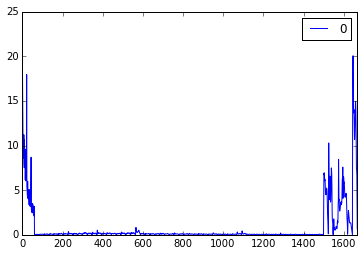

In [51]:
pd.DataFrame(X[0]).plot()

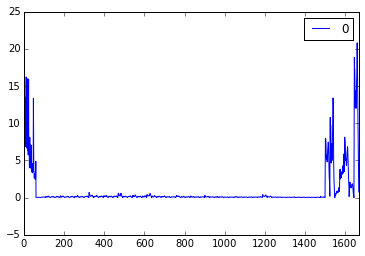

In [52]:
pd.DataFrame(X[1]).plot()

In [56]:
from sklearn.decomposition import PCA
p = PCA(n_components=10)

In [60]:
X2 = p.fit_transform(X)

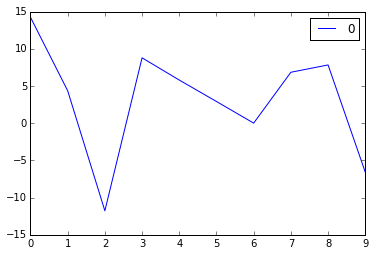

In [61]:
pd.DataFrame(X2[1]).plot()

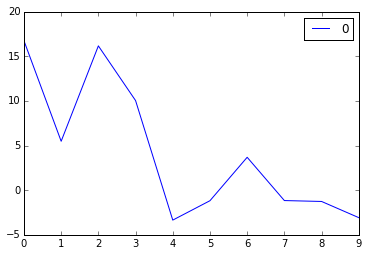

In [62]:
pd.DataFrame(X2[16]).plot()

In [33]:
from scipy.spatial.distance import pdist, squareform
pdist(X, 'euclidean')

array([ 28.5908992 ,  15.62621718,  10.72565927,  36.48347047,
        20.58073457,  16.41641789,  19.15530813,  19.6569894 ,
        22.02073494,  25.23901977,  21.40113395,  24.70596447,
        18.90403514,  23.15644494,  26.93681344,  26.15221373,
        28.94174011,  23.19461962,  28.69682918,  28.54220581,
        22.40877911,  18.23135527,  21.93320583,  24.18821904,
        23.27928318,  15.1965537 ,  18.48961085,  17.93643475,
        21.2286321 ,  21.47485986,  19.86879525,  19.14641965,
        37.29075183,  26.18280635,  20.03750574,  24.94587597,
        22.53405269,  28.0992114 ,  21.76199288,  27.01128408,
        30.00583223,  32.33000917,  28.03246478,  28.03384225,
        25.31566648,  25.32824847,  27.58513707,  29.5695306 ,
        30.24327937,  32.43342322,  23.67352289,  26.10829752,
        16.15037824,  31.2686497 ,  32.63709746,  35.5545284 ,
        26.46207079,  31.9879086 ,  31.41324719,  27.08047189,
        27.49850546,  31.55187916,  23.35595931,  28.12

In [78]:
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
from tools.viz_bench_tools_2 import *
from K_estim_pi_pen_EM import GraphLassoMix


In [105]:
alg = GraphLassoMix(lambda_param=1, n_iter=30, max_clusters=20)
res = alg.fit(X2)

-----------------------------------------
Param Lambda = 1
Max clusters:  20
Nombre d'iterations FISTA:  447
Algo Iteration:  0
[0.050672807798444894, 0.025330990787622611, 0.12630351629469472, 0.025330990787622611, 0.10123810578655597, 0.025330990787622611, 0.025330990787622611, 0.050672807798446087, 0.12644237284508281, 0.07598254572171069, 0.025330990787622611, 0.025330990787622611, 0.050672807703648376, 0.025330990787622611, 0.05067280779842849, 0.025330990787622611, 0.050672807798445699, 0.025330990787622611, 0.076109263245753442, 0.012581240120185628]
Algo Iteration:  1
[0.080485134362648744, 0.02506015836091979, 0.12612127191693398, 0.024122233689459226, 0.1008512698148752, 0.0065832557577057511, 0.049039651384455485, 0.050248199104508819, 0.12615571342992654, 0.075537452403253449, 0.0099563551224953195, 0.02506016909501323, 0.063833117018547658, 0.017831478760514146, 0.025861879148109855, 0.042391580805795033, 0.050249562204002313, 0.025061445303842651, 0.075550072316992817]
Al

In [108]:
len(res[0])

17

In [93]:
from sklearn.mixture import GMM

In [163]:
cl = GMM(n_components=6)

In [164]:
cl.fit_predict(X)

array([0, 4, 0, 0, 4, 1, 1, 2, 2, 1, 2, 1, 5, 1, 0, 4, 2, 2, 1, 4, 2, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 1, 1, 1, 3, 1, 2, 2, 2, 4, 1])

In [165]:
cl.means_

array([[ 0.02051701,  0.02492755,  0.02155636, ...,  0.01598912,
         0.01052962,  0.00226563],
       [ 0.02027616,  0.02494872,  0.02489879, ...,  0.01271968,
         0.00806243,  0.00165199],
       [ 0.02993207,  0.03191296,  0.02534563, ...,  0.02622807,
         0.01613272,  0.00315325],
       [ 0.02980139,  0.02638066,  0.02754406, ...,  0.04636796,
         0.02530894,  0.00498537],
       [ 0.02678266,  0.03000039,  0.02434684, ...,  0.02742034,
         0.0166939 ,  0.00344853],
       [ 0.01684   ,  0.02008604,  0.01998546, ...,  0.01613901,
         0.0123546 ,  0.00236759]])

In [117]:
zip(df.as_matrix()[:,0],df["cluster"])

[('01.CharliePuth-MarvinGaye(Feat.MeghanTrainor).mp3', 0),
 ('02.CalvinHarris+Disciples-HowDeepIsYourLove.mp3', 3),
 ("03.TheWeeknd-Can'tFeelMyFace.mp3", 0),
 ('04.LittleMix-BlackMagic.mp3', 0),
 ('05.LostFrequencies-AreYouWithMe.mp3', 3),
 ('06.Sigma-Glitterball(Feat.EllaHenderson).mp3', 9),
 ('07.Years&Years-Shine.mp3', 0),
 ('08.WALKTHEMOON-ShutUpandDance.mp3', 2),
 ('09.OneDirection-DragMeDown.mp3', 9),
 ('10.OMI-Cheerleader(FelixJaehnRemix).mp3', 1),
 ('11.MajorLazer&DJSnake-LeanOn(Feat.MO).mp3', 5),
 ('12.SamFeldt-ShowMeLove(Feat.KimberlyAnne).mp3', 1),
 ('13.Disclosure-Omen(Feat.SamSmith).mp3', 0),
 ('14.Avicii-WaitingforLove.mp3', 2),
 ('15.JasonDerulo-WanttoWantMe.mp3', 0),
 ('16.DavidZowie-HouseEveryWeekend(RadioEdit).mp3', 3),
 ('17.TinieTempah-NotLettingGo(Feat.JessGlynne).mp3', 4),
 ('18.FettyWap-TrapQueen.mp3', 6),
 ('19.EdSheeran-Photograph.mp3', 1),
 ('20.JoeStone-TheParty(ThisIsHowWeDoIt)(Feat.MontellJordan).mp3', 7),
 ('21.Silento-WatchMe_(WhipNaeNae).mp3', 9),
 ('22.

In [120]:
from sklearn.preprocessing import StandardScaler

In [126]:
sc = StandardScaler()

In [130]:
X2 = sc.fit_transform(X)

/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [128]:
sc.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
a = [np.array([[k,k],[k,k]]) for k in range(4)]

In [82]:
a

[array([[0, 0],
        [0, 0]]), array([[1, 1],
        [1, 1]]), array([[2, 2],
        [2, 2]]), array([[3, 3],
        [3, 3]])]

In [87]:
[b for b in a if np.count_nonzero(b) is not 0]

[array([[1, 1],
        [1, 1]]), array([[2, 2],
        [2, 2]]), array([[3, 3],
        [3, 3]])]

In [96]:
a =[1,2,3,4]
a = [a[i] for i in [0,1]]

In [97]:
a

[1, 2]